In [55]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb

In [56]:
df = pd.read_csv('data/top-500-movies.csv')
df

,rank,release_date,title,url,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,1,2019-04-23,Avengers: Endgame,/movie/Avengers-Endgame-(2019)#tab=summary,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019.0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,/movie/Pirates-of-the-Caribbean-On-Stranger-Ti...,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011.0
2,3,2015-04-22,Avengers: Age of Ultron,/movie/Avengers-Age-of-Ultron#tab=summary,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015.0
3,4,2015-12-16,Star Wars Ep. VII: The Force Awakens,/movie/Star-Wars-Ep-VII-The-Force-Awakens#tab=...,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015.0
4,5,2018-04-25,Avengers: Infinity War,/movie/Avengers-Infinity-War#tab=summary,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,2013-02-06,A Good Day to Die Hard,/movie/Die-Hard-5#tab=summary,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013.0
496,497,2004-04-09,The Alamo,/movie/Alamo-The-(2004)#tab=summary,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004.0
497,498,1995-12-22,Cutthroat Island,/movie/Cutthroat-Island#tab=summary,92000000,10017322,18517322,2371415.0,PG-13,Adventure,1619.0,NaN,1995.0
498,499,2013-12-19,The Secret Life of Walter Mitty,/movie/Secret-Life-of-Walter-Mitty-The-(2012)#...,91000000,58236838,187861183,12765508.0,PG,Adventure,2922.0,114.0,2013.0


In [57]:
df = df.drop(['url', 'rank', 'release_date'], axis=1)

In [58]:
df.isna().sum()

title               0
production_cost     0
domestic_gross      0
worldwide_gross     0
opening_weekend    21
mpaa                8
genre               5
theaters           21
runtime            13
year                1
dtype: int64

In [59]:
df.fillna(df.mean(numeric_only=True).round(), inplace=True)

In [60]:
df = df.loc[df['mpaa'] != 'Unrated', :]

In [61]:
df['year'] = df['year'].astype(int)

In [62]:
df.dropna(inplace=True)

In [63]:
df

,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019
1,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011
2,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015
3,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015
4,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018
...,...,...,...,...,...,...,...,...,...,...
494,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004
495,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013
496,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004
497,Cutthroat Island,92000000,10017322,18517322,2371415.0,PG-13,Adventure,1619.0,122.0,1995


In [64]:
df.dtypes

title               object
production_cost      int64
domestic_gross       int64
worldwide_gross      int64
opening_weekend    float64
mpaa                object
genre               object
theaters           float64
runtime            float64
year                 int64
dtype: object

In [65]:
df.isna().sum()

title              0
production_cost    0
domestic_gross     0
worldwide_gross    0
opening_weekend    0
mpaa               0
genre              0
theaters           0
runtime            0
year               0
dtype: int64

In [66]:
df.describe()

,production_cost,domestic_gross,worldwide_gross,opening_weekend,theaters,runtime,year
count,4.910000e+02,4.910000e+02,4.910000e+02,4.910000e+02,491.000000,491.000000,491.000000
mean,1.494872e+08,1.711753e+08,4.741240e+08,5.429206e+07,3659.775967,121.865580,2011.358452
std,4.759424e+07,1.420687e+08,3.854282e+08,4.562877e+07,539.291514,22.303341,6.533261
min,9.100000e+07,0.000000e+00,0.000000e+00,4.855800e+04,30.000000,76.000000,1991.000000
25%,1.100000e+08,7.287365e+07,2.150896e+08,2.467904e+07,3394.000000,105.000000,2007.000000
50%,1.400000e+08,1.321772e+08,3.674579e+08,4.363974e+07,3711.000000,120.000000,2012.000000
75%,1.750000e+08,2.191196e+08,6.484352e+08,6.770120e+07,4058.500000,135.000000,2016.000000
max,4.000000e+08,9.366622e+08,2.910371e+09,3.571150e+08,4802.000000,210.000000,2022.000000


In [67]:
df_corr = df.corr(numeric_only = True)

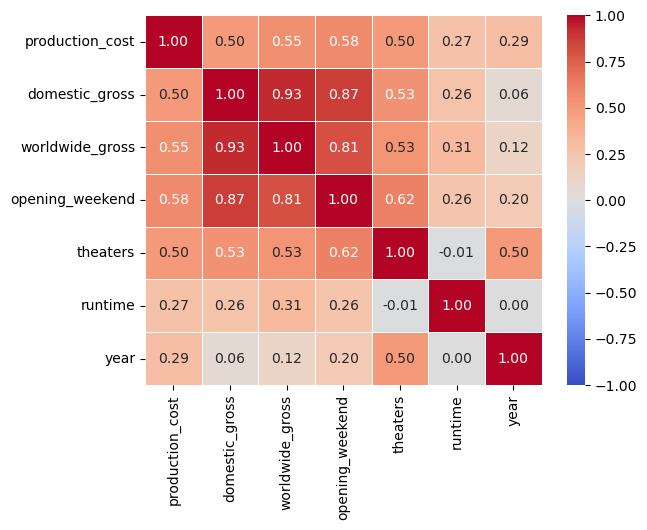

In [68]:
sb.heatmap(df_corr, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm', linecolor='white', linewidths=0.5, fmt='.2f')
plt.show()

In [69]:
X = df.loc[:, ['production_cost', 'opening_weekend', 'mpaa', 'genre', 'theaters', 'runtime', 'year']]
X

,production_cost,opening_weekend,mpaa,genre,theaters,runtime,year
0,400000000,357115007.0,PG-13,Action,4662.0,181.0,2019
1,379000000,90151958.0,PG-13,Adventure,4164.0,136.0,2011
2,365000000,191271109.0,PG-13,Action,4276.0,141.0,2015
3,306000000,247966675.0,PG-13,Adventure,4134.0,136.0,2015
4,300000000,257698183.0,PG-13,Action,4474.0,156.0,2018
...,...,...,...,...,...,...,...
494,92000000,70467623.0,PG,Adventure,3933.0,115.0,2004
495,92000000,24834845.0,R,Action,3555.0,98.0,2013
496,92000000,9124701.0,PG-13,Western,2609.0,137.0,2004
497,92000000,2371415.0,PG-13,Adventure,1619.0,122.0,1995


In [70]:
Y = df.loc[:, 'domestic_gross':'worldwide_gross']
Y

,domestic_gross,worldwide_gross
0,858373000,2797800564
1,241071802,1045713802
2,459005868,1395316979
3,936662225,2064615817
4,678815482,2048359754
...,...,...
494,261441092,631441092
495,67349198,304249198
496,22406362,23911362
497,10017322,18517322


In [71]:
df

,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year
0,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019
1,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011
2,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015
3,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015
4,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018
...,...,...,...,...,...,...,...,...,...,...
494,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004
495,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013
496,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004
497,Cutthroat Island,92000000,10017322,18517322,2371415.0,PG-13,Adventure,1619.0,122.0,1995


#### 인코딩

In [72]:
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_integer_dtype, is_float_dtype, is_object_dtype

In [73]:
X_new = pd.DataFrame()

for col in X:
    if is_integer_dtype(X[col]) : 
        X_new[col] = X[col]
    elif is_float_dtype(X[col]) :
        X_new[col] = X[col]
    elif is_object_dtype(X[col]) :
        encoder = LabelEncoder()
        X_new[col] = encoder.fit_transform(X[col])

In [74]:
X_new

,production_cost,opening_weekend,mpaa,genre,theaters,runtime,year
0,400000000,357115007.0,2,0,4662.0,181.0,2019
1,379000000,90151958.0,2,1,4164.0,136.0,2011
2,365000000,191271109.0,2,0,4276.0,141.0,2015
3,306000000,247966675.0,2,1,4134.0,136.0,2015
4,300000000,257698183.0,2,0,4474.0,156.0,2018
...,...,...,...,...,...,...,...
494,92000000,70467623.0,1,1,3933.0,115.0,2004
495,92000000,24834845.0,3,0,3555.0,98.0,2013
496,92000000,9124701.0,2,9,2609.0,137.0,2004
497,92000000,2371415.0,2,1,1619.0,122.0,1995


#### KMeans 클러스터링

In [75]:
from sklearn.cluster import KMeans

In [76]:
print('최적의 K값 결정')
max_k = min(10, X_new.shape[0])
print(f'데이터 개수: {X_new.shape[0]} / 최대 클러스터 개수: {max_k}')

최적의 K값 결정
데이터 개수: 491 / 최대 클러스터 개수: 10


In [82]:
wcss = []
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=4, n_init=10)
    kmeans.fit(X_new)
    wcss.append(kmeans.inertia_)

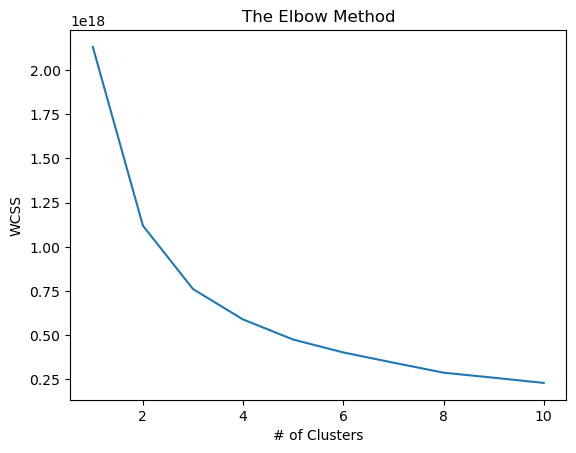

In [83]:
plt.plot(range(1, max_k + 1), wcss)
plt.title('The Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()  

In [84]:
# 최적의 K 결정
if max_k == 3 :
    if (wcss[0] - wcss[1]) / (wcss[1] - wcss[2]) >= 2 :
        k = 2
    else : 
        if wcss[0] / min(wcss) >= 2 :
            k = 3
        else :
            k = 1
elif max_k == 2 :
    if (wcss[0] - wcss[1]) / wcss[1] >= 1 :
        k = 2 
    else :
        k = 1
else:
    best = []
    cnt = 0
    for a in range(2, max_k - 1) :
        if wcss[a - 1] - wcss[a + 1] != 0 :
            new_delta = (wcss[a - 2] - wcss[a]) / (wcss[a - 1] - wcss[a + 1])
            if new_delta >= 2 :
                best.append(a)
            else :
                if cnt == 0 :
                    best.append(a)
                    cnt += 1
                else :
                    continue
    if len(best) != 0 :
         k = max(best)
    else : 
        k = max_k
print(f'🎯 최적의 클러스터 개수: {k}개')

🎯 최적의 클러스터 개수: 3개


In [85]:
kmeans = KMeans(n_clusters=k, random_state=4)
df['Group'] = kmeans.fit_predict(X_new)
print('✅ 그룹 정보가 저장되었습니다.')

✅ 그룹 정보가 저장되었습니다.


In [89]:
df

,title,production_cost,domestic_gross,worldwide_gross,opening_weekend,mpaa,genre,theaters,runtime,year,Group
0,Avengers: Endgame,400000000,858373000,2797800564,357115007.0,PG-13,Action,4662.0,181.0,2019,1
1,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,90151958.0,PG-13,Adventure,4164.0,136.0,2011,1
2,Avengers: Age of Ultron,365000000,459005868,1395316979,191271109.0,PG-13,Action,4276.0,141.0,2015,1
3,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,247966675.0,PG-13,Adventure,4134.0,136.0,2015,1
4,Avengers: Infinity War,300000000,678815482,2048359754,257698183.0,PG-13,Action,4474.0,156.0,2018,1
...,...,...,...,...,...,...,...,...,...,...,...
494,The Incredibles,92000000,261441092,631441092,70467623.0,PG,Adventure,3933.0,115.0,2004,0
495,A Good Day to Die Hard,92000000,67349198,304249198,24834845.0,R,Action,3555.0,98.0,2013,0
496,The Alamo,92000000,22406362,23911362,9124701.0,PG-13,Western,2609.0,137.0,2004,0
497,Cutthroat Island,92000000,10017322,18517322,2371415.0,PG-13,Adventure,1619.0,122.0,1995,0


In [41]:
df.to_csv('data/new_movie.csv', index=0)